# Solving Optimization Problems with Python

The `scipy.optimize.least_squares` function in Python is a powerful tool for solving optimization problems. It provides a range of algorithms to minimize scalar functions of one or more variables. This tutorial will guide you through the process of using `least_squares` to solve optimization problems step-by-step.

For more details, check the official [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html).

## Prerequisites

Make sure you have `scipy` installed. If not, you can install it using pip:

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Required Modules

Start by importing the necessary libraries:

In [2]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

## Step 2: Define the Objective Function

Define the function you want to minimize. For example, let's minimize the following quadratic function:

$$
    f(x) = (x - 3)^2 + 4
$$

Here is the corresponding Python code:

In [3]:
def objective_function(x):
    return (x - 3)**2 + 4

### Visualizing the Function

Before running the optimization, it's often helpful to visualize the function. You can use `matplotlib` to plot the function over a range of values:

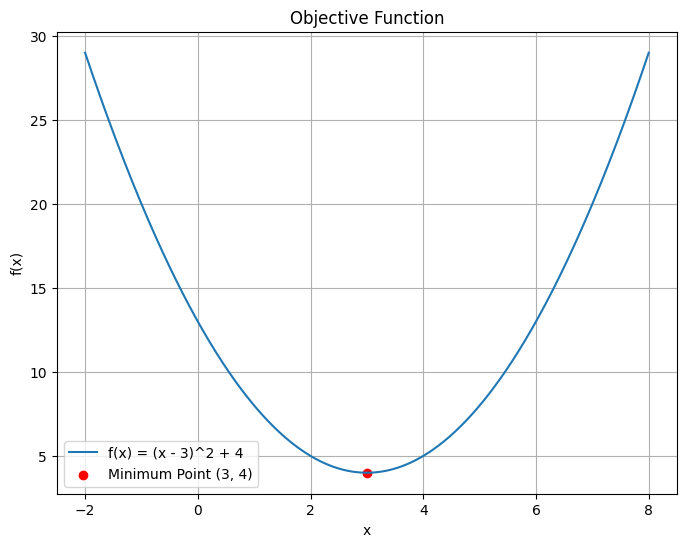

In [11]:
# Define a range of x values
x = np.linspace(-2, 8, 500)
y = (x - 3)**2 + 4

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = (x - 3)^2 + 4")
plt.scatter(3, 4, color='red', label="Minimum Point (3, 4)")
plt.title("Objective Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

## Step 3: Set an Initial Guess

Provide an initial guess for the solution. This is a required parameter for `minimize`.

In [23]:
initial_guess = [0]  # Starting point for the optimization

## Step 4: Call the `least_squares` Function

Use the `least_squares` function to solve the optimization problem. The "least-squares" optimization method tries to minimize the square of errors. See [https://en.wikipedia.org/wiki/Least_squares](https://en.wikipedia.org/wiki/Least_squares)

In [24]:
result = least_squares(objective_function, initial_guess)
result

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 4.000e+00]
           x: [ 3.000e+00]
        cost: 8.0
         jac: [[ 3.974e-08]]
        grad: [ 1.589e-07]
  optimality: 1.5894571940104166e-07
 active_mask: [ 0.000e+00]
        nfev: 17
        njev: 3

## Step 5: Analyze the Results

The result returned by `least_squares` is an object containing detailed information about the optimization process. You can extract the optimized parameters and the minimum value of the objective function:

In [25]:
print("Optimized Parameters:", result.x)
print("Minimum Value:", result.fun)

Optimized Parameters: [3.]
Minimum Value: [4.]


## Adding Constraints

`scipy.optimize.least_squares` also allows you to include constraints. For example, to add bounds or equality/inequality constraints:

### Example with Bounds

In [30]:
bounds = (-2, 2)  # -2 <= x <= 2
result = least_squares(objective_function, initial_guess, bounds=bounds)
print("Optimized Parameters with Bounds:", result.x)

Optimized Parameters with Bounds: [2.]


## Minimizing a Function with Two Parameters

Consider a function with two parameters:

$$
    f(x, y) = (x - 1)^2 + (y - 2)^2
$$

This function has a minimum at \((x, y) = (1, 2)\). Here's how to minimize it:

In [16]:
def objective_function_2d(vars):
    x, y = vars
    return (x - 1)**2 + (y - 2)**2

# Initial guess
initial_guess = [0, 0]

# Perform optimization
result = least_squares(objective_function_2d, initial_guess)

# Print results
print("Optimized Parameters:", result.x)
print("Minimum Value:", result.fun)

Optimized Parameters: [1.00011634 2.00023268]
Minimum Value: [6.76767219e-08]


### Visualizing the Function

For two variables, you can visualize the function as a contour plot:

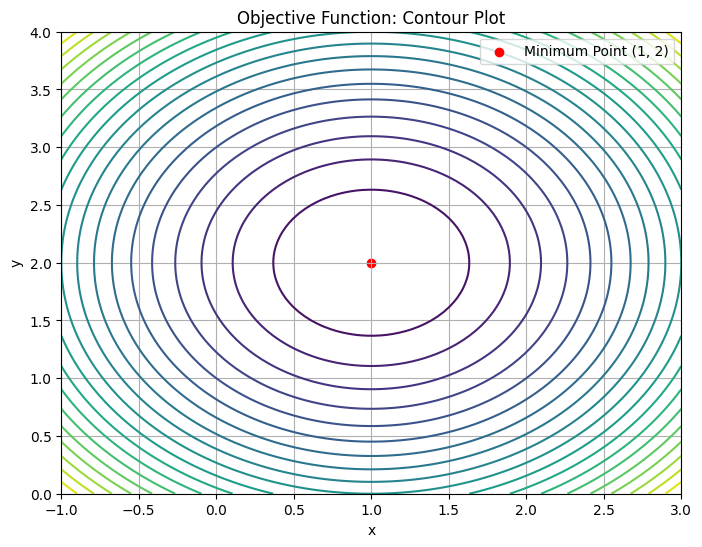

In [17]:
x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
x, y = np.meshgrid(x, y)
z = (x - 1)**2 + (y - 2)**2

plt.figure(figsize=(8, 6))
plt.contour(x, y, z, levels=20, cmap='viridis')
plt.scatter(1, 2, color='red', label="Minimum Point (1, 2)")
plt.title("Objective Function: Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## Exercises

1. When setting bounds on the optimization, an incorrect optimization parameter was returned. What should we check for when setting bounds?
2. The optimal parameters found above are not whole numbers (integers). Why do you think this is? Should we "clean up" these numbers? Justify your answer.